In [ ]:
library(IRkernel)
library(jsonlite)
library(repr)
.libPaths()
library(DESeq2)
library(IsoformSwitchAnalyzeR)

In [2]:
library(ggrepel)

In [108]:
#每种细胞类型循环分析
#celltypes <- c("Interneuron","ExN","L5_6","L5_6_CC","Olig")
celltypes <- c("L4","L2_3_ExN","IN_VIP","L5_6","L5_6_CC","Olig")
i=6
celltype <- celltypes[i]

isoformExpr <- importIsoformExpression(parentDir=paste0("/disk1/wenqing/tmp_data/ASD/salmon_quant_gencode_celltype/",celltype), pattern="quant.sf")

samples <- c("17","18","57","20","32","56")
condictions <- c(rep_len("ASD", 3), rep_len("Control", 3))
#samples <- c("17","18","57")
#condictions <- c(rep_len("ASD", 2), rep_len("Control", 1))
designM <- data.frame(sampleID=samples, condition=condictions)
designM
#构建switchAnalyzeRlist 对象
switchList <- importRdata(isoformCountMatrix=isoformExpr$counts, isoformRepExpression=isoformExpr$abundance, designMatrix=designM, isoformExonAnnoation="/disk1/wenqing/tmp_data/hg19/gencode.v44lift37.annotation.gtf", isoformNtFasta="/disk1/wenqing/tmp_data/hg19/gencode.v44lift37.transcripts.fa")
#isoformExpressionCutoff:abundance为过滤指标，去掉在所有样本中均未表达的isoform
#IFcutoff：IF usage为指标，isoform至少在一个样本中被使用
switchListF <- preFilter(switchList)
dim(switchListF$isoformCountMatrix)
#write.csv(switchListF$isoformCountMatrix,"/disk1/wenqing/tmp_data/ASD/isoformEx_abundance_filtered.csv",quote=F)
length(switchList$isoformFeatures$isoform_id)
#prefilter过滤掉86519（61.33%）的isoform
length(switchListF$isoformFeatures$isoform_id)


Step 1 of 3: Identifying which algorithm was used...

    The quantification algorithm used was: Salmon

    Found 6 quantification file(s) of interest

Step 2 of 3: Reading data...

reading in files with read_tsv

1 
2 
3 
4 
5 
6 


Step 3 of 3: Normalizing abundance values (not counts) via edgeR...

Done




sampleID,condition
<chr>,<chr>
17,ASD
18,ASD
57,ASD
20,Control
32,Control
56,Control


Step 1 of 10: Checking data...

Step 2 of 10: Obtaining annotation...

    importing GTF (this may take a while)...

Warning message in importRdata(isoformCountMatrix = isoformExpr$counts, isoformRepExpression = isoformExpr$abundance, :
"The annotation and quantification (count/abundance matrix and isoform annotation) Seem to be slightly different. 
Specifically:
 324 isoforms were only found in the annotation
 
Please make sure this is on purpouse since differences will cause inaccurate quantification and thereby skew all analysis.
 If you have quantified with Salmon this could be normal since it as default only keep one copy of identical sequnces (can be prevented using the --keepDuplicates option)
 We strongly encurage you to go back and figure out why this is the case.

"
    169674 ( 67.23%) isoforms were removed since they were not expressed in any samples.

Step 3 of 10: Fixing StringTie gene annoation problems...

    There were no need to rescue any annotation

    29527 genes

  |======================================================================| 100%


Step 8 of 10: Making comparisons...



  |======================================================================| 100%


Step 9 of 10: Making switchAnalyzeRlist object...

Warning message in createSwitchAnalyzeRlist(isoformFeatures = isoAnnot, exons = isoformExonStructure, :
"The gene_ids or isoform_ids were not unique - we identified multiple instances of the same gene_id/isoform_id on different chromosomes. To solve this we removed 20 gene_id. Please note there might still be duplicated gene_id located on the same chromosome. Some of these could be due to fusion transcripts which IsoformSwitchAnalyzeR cannot handle."
Step 10 of 10: Guestimating differential usage...

    The GUESSTIMATED number of genes with differential isoform usage are:



      comparison estimated_genes_with_dtu
1 ASD vs Control                140 - 233


Done


The filtering removed 35302 ( 42.81% of ) transcripts. There is now 47162 isoforms left



[1] 47162     7

[1] 82464

[1] 47162

In [109]:
iso_retained_intron <- switchList$isoformFeatures$isoform_id[switchList$isoformFeatures$iso_biotype=='retained_intron']
gene_retained_intron <- switchList$isoformFeatures$gene_id[switchList$isoformFeatures$iso_biotype=='retained_intron']
iso_gene_retained_intron <- as.data.frame(cbind(iso_retained_intron,gene_retained_intron))
rownames(iso_gene_retained_intron) <- iso_gene_retained_intron$iso_retained_intron
write.table(iso_gene_retained_intron,paste0("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/celltype_IR/",celltype,"_iso_gene_IR_info.txt"),quote=F,col.names=F,row.names=F)
rownames(switchList$isoformCountMatrix) <- switchList$isoformCountMatrix$isoform_id


In [110]:
asd_iso_17 <- rownames(switchList$isoformCountMatrix)[switchList$isoformCountMatrix[,'17']!=0]
asd_IR_iso_17 <- intersect(iso_retained_intron,asd_iso_17)
asd_no_IR_iso_17 <- setdiff(asd_iso_17,iso_retained_intron)
length(unique(asd_IR_iso_17))
length(unique(asd_no_IR_iso_17))
asd_iso_18 <- rownames(switchList$isoformCountMatrix)[switchList$isoformCountMatrix[,'18']!=0]
asd_IR_iso_18 <- intersect(iso_retained_intron,asd_iso_18)
asd_no_IR_iso_18 <- setdiff(asd_iso_18,iso_retained_intron)
length(unique(asd_IR_iso_18))
length(unique(asd_no_IR_iso_18))
asd_iso_57 <- rownames(switchList$isoformCountMatrix)[switchList$isoformCountMatrix[,'57']!=0]
asd_IR_iso_57 <- intersect(iso_retained_intron,asd_iso_57)
asd_no_IR_iso_57 <- setdiff(asd_iso_57,iso_retained_intron)
length(unique(asd_IR_iso_57))
length(unique(asd_no_IR_iso_57))
write.table(asd_IR_iso_57,paste0("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/celltype_IR/iso_retained_intron/",celltype,"/57.txt"),quote=F,row.names=F,col.names=F)
write.table(asd_IR_iso_17,paste0("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/celltype_IR/iso_retained_intron/",celltype,"/17.txt"),quote=F,row.names=F,col.names=F)
write.table(asd_IR_iso_18,paste0("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/celltype_IR/iso_retained_intron/",celltype,"/18.txt"),quote=F,row.names=F,col.names=F)
write.table(asd_no_IR_iso_57,paste0("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/celltype_IR/iso_retained_intron/",celltype,"/no_57.txt"),quote=F,row.names=F,col.names=F)
write.table(asd_no_IR_iso_18,paste0("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/celltype_IR/iso_retained_intron/",celltype,"/no_18.txt"),quote=F,row.names=F,col.names=F)
write.table(asd_no_IR_iso_17,paste0("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/celltype_IR/iso_retained_intron/",celltype,"/no_17.txt"),quote=F,row.names=F,col.names=F)

[1] 5538

[1] 24825

[1] 10436

[1] 44253

[1] 6196

[1] 26252

In [111]:
#cat 17.txt 18.txt 57.txt > Olig_iso_IR.txt
#cat no_17.txt no_18.txt no_57.txt > Olig_iso_no_IR.txt
celltype_iso_IR <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/celltype_IR/iso_retained_intron/",celltype,"/",celltype,"_iso_IR.txt"))$V1

celltype_gene_IR <- iso_gene_retained_intron[celltype_iso_IR,'gene_retained_intron']
#length(unique(celltype_gene_IR))
celltype_down_genes <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/",celltype,"_down.txt"))$x
celltype_up_genes <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/",celltype,"_up.txt"))$x

write.table(intersect(celltype_down_genes,unique(celltype_gene_IR)),paste0("/disk1/wenqing/tmp_data/ASD/de_ei_iso_IR/",celltype,"_deEI_down_iso_IR.txt"),quote=F,col.names=F,row.names=F)
write.table(intersect(celltype_up_genes,unique(celltype_gene_IR)),paste0("/disk1/wenqing/tmp_data/ASD/de_ei_iso_IR/",celltype,"_deEI_up_iso_IR.txt"),quote=F,col.names=F,row.names=F)


In [112]:
sum(length(intersect(celltype_down_genes,unique(celltype_gene_IR))),length(intersect(celltype_up_genes,unique(celltype_gene_IR))))
length(unique(celltype_gene_IR))

[1] 18

[1] 6038

In [113]:
#cat no_17.txt no_18.txt no_57.txt > IN_VIP_iso_no_IR.txt
celltype_iso_no_IR <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/celltype_IR/iso_retained_intron/",celltype,"/",celltype,"_iso_no_IR.txt"))$V1

celltype_gene_no_IR <- unique(switchList$isoformFeatures$gene_id[switchList$isoformFeatures$isoform_id %in% celltype_iso_no_IR])


In [114]:
sum(length(intersect(celltype_down_genes,unique(celltype_gene_no_IR))),length(intersect(celltype_up_genes,unique(celltype_gene_no_IR))))
length(unique(celltype_gene_no_IR))

[1] 47

[1] 25404

In [107]:

write.table(intersect(celltype_down_genes,unique(celltype_gene_no_IR)),paste0("/disk1/wenqing/tmp_data/ASD/de_ei_iso_IR/",celltype,"_deEI_down_iso_no_IR.txt"),quote=F,col.names=F,row.names=F)
write.table(intersect(celltype_up_genes,unique(celltype_gene_no_IR)),paste0("/disk1/wenqing/tmp_data/ASD/de_ei_iso_IR/",celltype,"_deEI_up_iso_no_IR.txt"),quote=F,col.names=F,row.names=F)


In [74]:
my_ka <- matrix(c(90,6250,23,31316),nrow=2,byrow=T)
colnames(my_ka) <- c('0','1')

rownames(my_ka) <- c('0','1')
my_ka
chisq.test(my_ka)

,0,1
0,90,6250
1,23,31316



	Pearson's Chi-squared test with Yates' continuity correction

data:  my_ka
X-squared = 315.11, df = 1, p-value < 2.2e-16


In [75]:
90/6250
23/31316

[1] 0.0144

[1] 0.0007344488

In [ ]:
#isoformSwitchTestDEXSeq:分析差异表达的isoform
#uses DEXSeq to test for differential isoform usage using the replicate count matrix.
#dIFcutoff：过滤在两条件下IF usage没有改变的isoform
switchListD <- isoformSwitchTestDEXSeq(switchAnalyzeRlist=switchListF, alpha=0.05)         
ggplot(data=switchListD$isoformFeatures, aes(x=dIF, y=-log10(isoform_switch_q_value))) +
  geom_point(
    aes( color=abs(dIF) > 0.1 & isoform_switch_q_value < 0.05 ), # default cutoff
    size=1
  ) +
  geom_hline(yintercept = -log10(0.05), linetype='dashed') + # default cutoff
  geom_vline(xintercept = c(-0.1, 0.1), linetype='dashed') + # default cutoff
  scale_color_manual('Signficant\nIsoform Switch', values = c('black','red')) +
  labs(x='dIF', y='-Log10 ( Isoform Switch Q Value )') +
  theme_bw()

#将差异表达isoform提取成表格
attach(switchListD$isoformFeatures)
de_isoform <- switchListD$isoformFeatures[abs(dIF) > 0.1 & isoform_switch_q_value < 0.05,]
dim(de_isoform)
write.csv(de_isoform,paste0("/disk1/wenqing/tmp_data/ASD/deEx_isoform_",celltype,".csv"),quote=F)
switchListO <- analyzeORF(switchListD)
#提取转录本的核苷酸序列+氨基酸序列

output_path <- paste0("/disk1/wenqing/tmp_data/ASD/IsoformSequence_",celltype)

switchListS <- extractSequence(switchListO, pathToOutput=output_path)
extractSwitchSummary(switchListS)
#分析一个isoform是否属于可变剪切的结果
#将一个gene的isoform与该gene所有exon组成的pri-mRNA对比，得到该isoform的剪接形式
switchListA <- analyzeAlternativeSplicing(switchListS)                                     
names(switchListA)
#switchListA$isoformFeatures$IR列代表：该isoform具有的intron retained的数量
table(switchListA$isoformFeatures$IR)
head(switchListA$AlternativeSplicingAnalysis)
write.csv(switchListA$isoformFeatures[switchListA$isoformFeatures$IR!=0,],paste0("/disk1/wenqing/tmp_data/ASD/isoform_IR_",celltype,".csv"),quote=F)
write.csv(switchListA$AlternativeSplicingAnalysis[switchListA$AlternativeSplicingAnalysis$IR!=0,],paste0("/disk1/wenqing/tmp_data/ASD/isoform_IR/isoform_IR_",celltype,"_wzIRBorder.csv"),quote=F)
pdf(paste0("/disk1/wenqing/tmp_data/ASD/Iso_celltype_res/ASEvents/SplicingSummary_",celltype,".pdf"))
extractSplicingSummary(switchListA)
extractSplicingEnrichment(switchListA)
extractSplicingGenomeWide(switchListA)
dev.off()

#差异表达且发生IR的iso
isoform_IR <- switchListA$isoformFeatures[switchListA$isoformFeatures$IR!=0,]
de_isoform_IR <- isoform_IR[isoform_IR$isoform_id %in% de_isoform$isoform_id,]
#dim(de_isoform_IR)
#write.csv(de_isoform_IR,paste0("/disk1/wenqing/tmp_data/ASD/de_isoform_IR_",celltype,".csv"),quote=F)


In [99]:
celltypes <- c("L4","L2_3_ExN","IN_VIP","L5_6","L5_6_CC","Olig")
i=5
  celltype <- celltypes[i]

  isoformExpr <- importIsoformExpression(parentDir=paste0("/disk1/wenqing/tmp_data/ASD/salmon_quant_gencode_celltype/",celltype), pattern="quant.sf")

  samples <- c("17","18","57","20","32","56")
  condictions <- c(rep_len("ASD", 3), rep_len("Control", 3))
  #samples <- c("17","18","57")
  #condictions <- c(rep_len("ASD", 2), rep_len("Control", 1))
  designM <- data.frame(sampleID=samples, condition=condictions)
  designM
  #构建switchAnalyzeRlist 对象
  switchList <- importRdata(isoformCountMatrix=isoformExpr$counts, isoformRepExpression=isoformExpr$abundance, designMatrix=designM, isoformExonAnnoation="/disk1/wenqing/tmp_data/hg19/gencode.v44lift37.annotation.gtf", isoformNtFasta="/disk1/wenqing/tmp_data/hg19/gencode.v44lift37.transcripts.fa")
  #isoformExpressionCutoff:abundance为过滤指标，去掉在所有样本中均未表达的isoform
  #IFcutoff：IF usage为指标，isoform至少在一个样本中被使用
  switchListF <- preFilter(switchList)
  dim(switchListF$isoformCountMatrix)
  #write.csv(switchListF$isoformCountMatrix,"/disk1/wenqing/tmp_data/ASD/isoformEx_abundance_filtered.csv",quote=F)
  length(switchList$isoformFeatures$isoform_id)
  #prefilter过滤掉86519（61.33%）的isoform
  length(switchListF$isoformFeatures$isoform_id)
  #isoformSwitchTestDEXSeq:分析差异表达的isoform
  #uses DEXSeq to test for differential isoform usage using the replicate count matrix.
  #dIFcutoff：过滤在两条件下IF usage没有改变的isoform
  switchListD <- isoformSwitchTestDEXSeq(switchAnalyzeRlist=switchListF, alpha=0.05) 
  attach(switchListD$isoformFeatures)        
  de_isoform <- switchListD$isoformFeatures[abs(dIF) > 0.1 & isoform_switch_q_value < 0.05,]

  switchListO <- analyzeORF(switchListD)
  #提取转录本的核苷酸序列+氨基酸序列

  output_path <- paste0("/disk1/wenqing/tmp_data/ASD/IsoformSequence_celltype/IsoformSequence_",celltype)

  switchListS <- extractSequence(switchListO, pathToOutput=output_path)
  extractSwitchSummary(switchListS)
  #分析一个isoform是否属于可变剪切的结果
  #将一个gene的isoform与该gene所有exon组成的pri-mRNA对比，得到该isoform的剪接形式
  switchListA <- analyzeAlternativeSplicing(switchListS) 

  write.csv(switchListA$AlternativeSplicingAnalysis[switchListA$AlternativeSplicingAnalysis$IR!=0,],paste0("/disk1/wenqing/tmp_data/ASD/isoform_IR/isoform_IR_",celltype,"_wzIRBorder.csv"),quote=F)



  isoform_IR <- switchListA$isoformFeatures[switchListA$isoformFeatures$IR!=0,]
  de_isoform_IR <- isoform_IR[isoform_IR$isoform_id %in% de_isoform$isoform_id,]

  switchListD$isoformFeatures$flag <- 0
  switchListD$isoformFeatures$flag[switchListD$isoformFeatures$isoform_id %in% de_isoform_IR$isoform_id] <- 1
  sub_iso=switchListD$isoformFeatures %>% filter(flag ==1)

  p1 <- ggplot(data=switchListD$isoformFeatures, aes(x=dIF, y=-log10(isoform_switch_q_value))) +
    geom_point(
      aes( color=abs(dIF) > 0.1 & isoform_switch_q_value < 0.05 ), # default cutoff
      size=1
    ) +
    geom_hline(yintercept = -log10(0.05), linetype='dashed') + # default cutoff
    geom_vline(xintercept = c(-0.1, 0.1), linetype='dashed') + # default cutoff
    scale_color_manual('Signficant\nIsoform Switch', values = c('black','red')) +
    labs(x='dIF', y='-Log10 ( Isoform Switch Q Value )') +
    theme_bw()+
    geom_label_repel(aes(label=gene_id),sub_iso)
  ggsave(paste0("/disk1/wenqing/tmp_data/ASD/deX_isoform/figures/deEx_isoform_",celltype,".pdf"),p1)




Step 1 of 3: Identifying which algorithm was used...

    The quantification algorithm used was: Salmon

    Found 6 quantification file(s) of interest

Step 2 of 3: Reading data...

reading in files with read_tsv

1 
2 
3 
4 
5 
6 


Step 3 of 3: Normalizing abundance values (not counts) via edgeR...

Done




sampleID,condition
<chr>,<chr>
17,ASD
18,ASD
57,ASD
20,Control
32,Control
56,Control


Step 1 of 10: Checking data...

Step 2 of 10: Obtaining annotation...

    importing GTF (this may take a while)...

Warning message in importRdata(isoformCountMatrix = isoformExpr$counts, isoformRepExpression = isoformExpr$abundance, :
"The annotation and quantification (count/abundance matrix and isoform annotation) Seem to be slightly different. 
Specifically:
 324 isoforms were only found in the annotation
 
Please make sure this is on purpouse since differences will cause inaccurate quantification and thereby skew all analysis.
 If you have quantified with Salmon this could be normal since it as default only keep one copy of identical sequnces (can be prevented using the --keepDuplicates option)
 We strongly encurage you to go back and figure out why this is the case.

"
    156453 ( 61.99%) isoforms were removed since they were not expressed in any samples.

Step 3 of 10: Fixing StringTie gene annoation problems...

    There were no need to rescue any annotation

    32639 genes

  |======================================================================| 100%


Step 8 of 10: Making comparisons...



  |======================================================================| 100%


Step 9 of 10: Making switchAnalyzeRlist object...

Warning message in createSwitchAnalyzeRlist(isoformFeatures = isoAnnot, exons = isoformExonStructure, :
"The gene_ids or isoform_ids were not unique - we identified multiple instances of the same gene_id/isoform_id on different chromosomes. To solve this we removed 23 gene_id. Please note there might still be duplicated gene_id located on the same chromosome. Some of these could be due to fusion transcripts which IsoformSwitchAnalyzeR cannot handle."
Step 10 of 10: Guestimating differential usage...

    The GUESSTIMATED number of genes with differential isoform usage are:



      comparison estimated_genes_with_dtu
1 ASD vs Control                  38 - 63


Done


The filtering removed 46289 ( 48.42% of ) transcripts. There is now 49315 isoforms left



[1] 49315     7

[1] 95604

[1] 49315

Step 1 of 2: Testing each pairwise comparisons with DEXSeq (this might be a bit slow)...

    Estimated run time is: 22.5 min

Step 2 of 2: Integrating result into switchAnalyzeRlist...

    Isoform switch analysis was performed for 11798 gene comparisons (100%).

Total runtime: 1.94 min

Done

The following objects are masked from switchListD$isoformFeatures (pos = 3):

    condition_1, condition_2, dIF, gene_biotype, gene_id,
    gene_log2_fold_change, gene_name, gene_overall_mean, gene_q_value,
    gene_ref, gene_stderr_1, gene_stderr_2, gene_switch_q_value,
    gene_value_1, gene_value_2, IF_overall, IF1, IF2, iso_biotype,
    iso_log2_fold_change, iso_overall_mean, iso_q_value, iso_ref,
    iso_stderr_1, iso_stderr_2, iso_value_1, iso_value_2, isoform_id,
    isoform_switch_q_value, PTC


The following objects are masked from switchListD$isoformFeatures (pos = 4):

    condition_1, condition_2, dIF, gene_biotype, gene_id,
    gene_log2_fold_change, gene_name, gene_overall_mean, ge

  |======================================================================| 100%


Step 3 of 3 : Scanning for PTCs...

383 putative ORFs were identified, analyzed and added.

Done

Step 1 of 3 : Extracting transcript nucleotide sequences...

Step 2 of 3 : Extracting ORF AA sequences...

Step 3 of 3 : Preparing output...

The 'removeLongAAseq' and 'removeShortAAseq' arguments:
 Removed : 0 isoforms.
 Trimmed : 0 isoforms (to only contain the first 1000 AA)

Done



Comparison,nrIsoforms,nrSwitches,nrGenes
<chr>,<int>,<int>,<int>
ASD vs Control,83,107,72


Step 1 of 3: Massaging data...

Step 2 of 3: Analyzing splicing...



  |======================================================================| 100%


Step 3 of 3: Preparing output...

Done

Saving 6.67 x 6.67 in image


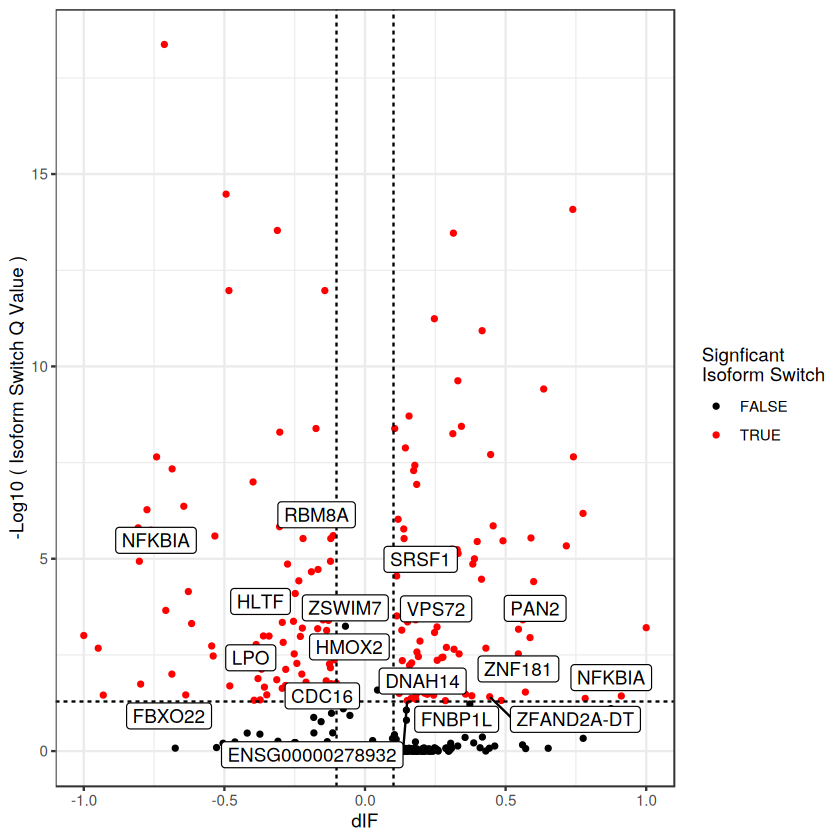

In [97]:
p1

In [ ]:
#count: counts由abundance转化而来
#head(isoformExpr$importOptions)

$calculateCountsFromAbundance
[1] TRUE

$interLibNormTxPM
[1] TRUE

$normalizationMethod
[1] "TMM"

In [ ]:
#abundance=TxPM(相当于RPKM/FPKM)，但已经根据用于量化的工具模拟的所有偏差进行了调整，包括片段长度分布和序列特异性偏差以及GC-片段偏差（这取决于每个工具及其运行方式，因此您需要查找具体的工具）。TxPM对于比较丰度的表达是最优的，因为大多数偏差都会被考虑在内。
#head(isoformExpr$abundance)
#head(isoformExpr$counts)
#names(isoformExpr)
#head(isoformExpr$importOptions)

In [10]:
head(switchList$isoformFeatures)
#dim(as.data.frame(switchList$exons))
#head(switchList$exons@ranges)
#write.csv(as.data.frame(switchList$exons),'/disk1/wenqing/tmp_data/ASD/switchList_exon.csv',quote=F)

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
92411,isoComp_00000001,geneComp_00000001,ENST00000649180.1_1,5S_rRNA,ASD,Control,5S_rRNA,rRNA_pseudogene,rRNA_pseudogene,11.659941,⋯,23.31988222,11.1879633,NA,1.000000000,NaN,1.000000000,NaN,NA,NA,NA
23561,isoComp_00000002,geneComp_00000002,ENST00000595014.1_3,A1BG,ASD,Control,A1BG,protein_coding,retained_intron,13.890085,⋯,1.35825752,0.9575835,NA,0.289566667,0.14466667,0.434466667,0.289800000,NA,NA,NA
23562,isoComp_00000003,geneComp_00000002,ENST00000596924.1_3,A1BG,ASD,Control,A1BG,protein_coding,protein_coding_CDS_not_defined,13.890085,⋯,0.24565356,0.1065964,NA,0.098483333,0.07153333,0.125433333,0.053900000,NA,NA,NA
23563,isoComp_00000004,geneComp_00000002,ENST00000598345.1_3,A1BG,ASD,Control,A1BG,protein_coding,retained_intron,13.890085,⋯,3.93253431,-1.0580256,NA,0.611966667,0.78380000,0.440133333,-0.343666667,NA,NA,NA
88776,isoComp_00000005,geneComp_00000003,ENST00000593960.6_2,A1BG-AS1,ASD,Control,A1BG-AS1,lncRNA,lncRNA,1.591412,⋯,0.01534964,1.3419655,NA,0.003266667,0.00000000,0.006533333,0.006533333,NA,NA,NA
88777,isoComp_00000006,geneComp_00000003,ENST00000594950.5_1,A1BG-AS1,ASD,Control,A1BG-AS1,lncRNA,lncRNA,1.591412,⋯,0.13406716,3.8486696,NA,0.021400000,0.00000000,0.042800000,0.042800000,NA,NA,NA


In [11]:
#PTC: A logic indicating whether the isoform is classified as having a Premature Termination Codon. This is defined as having a stop codon more than PTCDistance (default is 50) nt upstream of the last exon exon junction.
table(switchList$isoformFeatures$PTC)


FALSE  TRUE 
36540  7362 

In [12]:
head(switchList$isoformFeatures)

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
92411,isoComp_00000001,geneComp_00000001,ENST00000649180.1_1,5S_rRNA,ASD,Control,5S_rRNA,rRNA_pseudogene,rRNA_pseudogene,11.659941,⋯,23.31988222,11.1879633,NA,1.000000000,NaN,1.000000000,NaN,NA,NA,NA
23561,isoComp_00000002,geneComp_00000002,ENST00000595014.1_3,A1BG,ASD,Control,A1BG,protein_coding,retained_intron,13.890085,⋯,1.35825752,0.9575835,NA,0.289566667,0.14466667,0.434466667,0.289800000,NA,NA,NA
23562,isoComp_00000003,geneComp_00000002,ENST00000596924.1_3,A1BG,ASD,Control,A1BG,protein_coding,protein_coding_CDS_not_defined,13.890085,⋯,0.24565356,0.1065964,NA,0.098483333,0.07153333,0.125433333,0.053900000,NA,NA,NA
23563,isoComp_00000004,geneComp_00000002,ENST00000598345.1_3,A1BG,ASD,Control,A1BG,protein_coding,retained_intron,13.890085,⋯,3.93253431,-1.0580256,NA,0.611966667,0.78380000,0.440133333,-0.343666667,NA,NA,NA
88776,isoComp_00000005,geneComp_00000003,ENST00000593960.6_2,A1BG-AS1,ASD,Control,A1BG-AS1,lncRNA,lncRNA,1.591412,⋯,0.01534964,1.3419655,NA,0.003266667,0.00000000,0.006533333,0.006533333,NA,NA,NA
88777,isoComp_00000006,geneComp_00000003,ENST00000594950.5_1,A1BG-AS1,ASD,Control,A1BG-AS1,lncRNA,lncRNA,1.591412,⋯,0.13406716,3.8486696,NA,0.021400000,0.00000000,0.042800000,0.042800000,NA,NA,NA


In [14]:
table(switchList$isoformFeatures$IF_overall==0)


FALSE  TRUE 
96199    20 

In [18]:
names(switchListD)

[1] "isoformFeatures"       "exons"                 "conditions"           
 [4] "designMatrix"          "sourceId"              "isoformCountMatrix"   
 [7] "isoformRepExpression"  "runInfo"               "orfAnalysis"          
[10] "isoformRepIF"          "ntSequence"            "isoformSwitchAnalysis"

In [19]:
head(switchListD$isoformFeatures$gene_id)

[1] "ADPGK"  "ADPGK"  "ADPGK"  "AKR1E2" "AKR1E2" "AKR1E2"

In [ ]:
switchListD$isoformFeatures %>% 
  dplyr::filter(gene_id=="ACSL6")

In [ ]:
switchPlot(switchListD, gene = 'ACSL6',
           condition1="ASD",
           condition2="Control")

In [22]:
dim(switchListD$isoformFeatures)
length(unique(switchListD$isoformFeatures$isoform_id))
head(switchListD$isoformFeatures)

[1] 874  30

[1] 874

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
44993,isoComp_00001783,geneComp_00000577,ENST00000456471.3_6,ADPGK,ASD,Control,ADPGK,protein_coding,protein_coding,19.08097,⋯,0.44097500,-0.9669318,NA,0.09978333,0.1244333,0.075133333,-0.0493000,1.00000000,0.00275992,FALSE
44994,isoComp_00001784,geneComp_00000577,ENST00000562621.1_3,ADPGK,ASD,Control,ADPGK,protein_coding,retained_intron,19.08097,⋯,2.31330669,0.2105702,NA,0.79390000,0.6661000,0.921700000,0.2556000,0.92719830,0.00275992,NA
44996,isoComp_00001786,geneComp_00000577,ENST00000569058.1_3,ADPGK,ASD,Control,ADPGK,protein_coding,retained_intron,19.08097,⋯,0.06615688,-5.8666889,NA,0.10601667,0.2088667,0.003166667,-0.2057000,0.00275992,0.00275992,NA
49466,isoComp_00002453,geneComp_00000752,ENST00000298375.12_3,AKR1E2,ASD,Control,AKR1E2,protein_coding,protein_coding,1.63562,⋯,0.02285267,-5.6463941,NA,0.61338333,0.8934333,0.333333333,-0.5601000,0.94169619,0.02734436,FALSE
49468,isoComp_00002455,geneComp_00000752,ENST00000474119.5_1,AKR1E2,ASD,Control,AKR1E2,protein_coding,nonsense_mediated_decay,1.63562,⋯,0.20560635,5.1851561,NA,0.07656667,0.0000000,0.153133333,0.1531333,0.82844863,0.02734436,TRUE
49469,isoComp_00002456,geneComp_00000752,ENST00000487985.1_3,AKR1E2,ASD,Control,AKR1E2,protein_coding,protein_coding,1.63562,⋯,0.60477785,6.8097157,NA,0.24803333,0.0000000,0.496066667,0.4960667,0.02734436,0.02734436,FALSE


In [26]:
head(switchListD$isoformFeatures)

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
44993,isoComp_00001783,geneComp_00000577,ENST00000456471.3_6,ADPGK,ASD,Control,ADPGK,protein_coding,protein_coding,19.08097,⋯,0.44097500,-0.9669318,NA,0.09978333,0.1244333,0.075133333,-0.0493000,1.00000000,0.00275992,FALSE
44994,isoComp_00001784,geneComp_00000577,ENST00000562621.1_3,ADPGK,ASD,Control,ADPGK,protein_coding,retained_intron,19.08097,⋯,2.31330669,0.2105702,NA,0.79390000,0.6661000,0.921700000,0.2556000,0.92719830,0.00275992,NA
44996,isoComp_00001786,geneComp_00000577,ENST00000569058.1_3,ADPGK,ASD,Control,ADPGK,protein_coding,retained_intron,19.08097,⋯,0.06615688,-5.8666889,NA,0.10601667,0.2088667,0.003166667,-0.2057000,0.00275992,0.00275992,NA
49466,isoComp_00002453,geneComp_00000752,ENST00000298375.12_3,AKR1E2,ASD,Control,AKR1E2,protein_coding,protein_coding,1.63562,⋯,0.02285267,-5.6463941,NA,0.61338333,0.8934333,0.333333333,-0.5601000,0.94169619,0.02734436,FALSE
49468,isoComp_00002455,geneComp_00000752,ENST00000474119.5_1,AKR1E2,ASD,Control,AKR1E2,protein_coding,nonsense_mediated_decay,1.63562,⋯,0.20560635,5.1851561,NA,0.07656667,0.0000000,0.153133333,0.1531333,0.82844863,0.02734436,TRUE
49469,isoComp_00002456,geneComp_00000752,ENST00000487985.1_3,AKR1E2,ASD,Control,AKR1E2,protein_coding,protein_coding,1.63562,⋯,0.60477785,6.8097157,NA,0.24803333,0.0000000,0.496066667,0.4960667,0.02734436,0.02734436,FALSE


In [28]:
head(switchListO$isoformFeatures)
names(switchListO)

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
44993,isoComp_00001783,geneComp_00000577,ENST00000456471.3_6,ADPGK,ASD,Control,ADPGK,protein_coding,protein_coding,19.08097,⋯,0.44097500,-0.9669318,NA,0.09978333,0.1244333,0.075133333,-0.0493000,1.00000000,0.00275992,FALSE
44994,isoComp_00001784,geneComp_00000577,ENST00000562621.1_3,ADPGK,ASD,Control,ADPGK,protein_coding,retained_intron,19.08097,⋯,2.31330669,0.2105702,NA,0.79390000,0.6661000,0.921700000,0.2556000,0.92719830,0.00275992,FALSE
44996,isoComp_00001786,geneComp_00000577,ENST00000569058.1_3,ADPGK,ASD,Control,ADPGK,protein_coding,retained_intron,19.08097,⋯,0.06615688,-5.8666889,NA,0.10601667,0.2088667,0.003166667,-0.2057000,0.00275992,0.00275992,FALSE
49466,isoComp_00002453,geneComp_00000752,ENST00000298375.12_3,AKR1E2,ASD,Control,AKR1E2,protein_coding,protein_coding,1.63562,⋯,0.02285267,-5.6463941,NA,0.61338333,0.8934333,0.333333333,-0.5601000,0.94169619,0.02734436,FALSE
49468,isoComp_00002455,geneComp_00000752,ENST00000474119.5_1,AKR1E2,ASD,Control,AKR1E2,protein_coding,nonsense_mediated_decay,1.63562,⋯,0.20560635,5.1851561,NA,0.07656667,0.0000000,0.153133333,0.1531333,0.82844863,0.02734436,TRUE
49469,isoComp_00002456,geneComp_00000752,ENST00000487985.1_3,AKR1E2,ASD,Control,AKR1E2,protein_coding,protein_coding,1.63562,⋯,0.60477785,6.8097157,NA,0.24803333,0.0000000,0.496066667,0.4960667,0.02734436,0.02734436,NA


[1] "isoformFeatures"       "exons"                 "conditions"           
 [4] "designMatrix"          "sourceId"              "isoformCountMatrix"   
 [7] "isoformRepExpression"  "runInfo"               "orfAnalysis"          
[10] "isoformRepIF"          "ntSequence"            "isoformSwitchAnalysis"

In [ ]:
#为每个isoform添加coding potential分数
#switchListC <- analyzeCPAT(switchListS, pathToCPATresultFile="/disk1/wenqing/tmp_data/ASD/prepForIso/cpat_res/output1", codingCutoff=0.364, removeNoncodinORFs=FALSE)


Added coding potential to 587 (100%) transcripts



In [ ]:
#names(switchListC)
#str(switchListC$aaSequence)
#587个有isoform usage组件差异的isoform仅有120个有coding potential
#table(switchListC$isoformFeatures$codingPotential)

[1] "isoformFeatures"       "exons"                 "conditions"           
 [4] "designMatrix"          "sourceId"              "isoformCountMatrix"   
 [7] "isoformRepExpression"  "runInfo"               "orfAnalysis"          
[10] "isoformRepIF"          "ntSequence"            "isoformSwitchAnalysis"
[13] "aaSequence"


FALSE  TRUE 
  467   120 

In [ ]:
#analyzePFAM：添加Prediction of protein domains的结果
#switchListP <- analyzePFAM(switchListC, pathToPFAMresultFile="/disk1/wenqing/tmp_data/ASD/prepForIso/pfam_res/pfam_scan_result.fa")                            


Converting AA coordinats to transcript and genomic coordinats...



  |======================================================================| 100%


Added domain information to 223 (37.99%) transcripts



In [ ]:
#names(switchListP)
#587-295-223
#587个iso中，295个未落在domain中，223落在结构域中，69个信息未知,其中：223个iso所位于的domain有重叠，详见switchListP$domainAnalysis
#table(switchListP$isoformFeatures$domain_identified)
#head(switchListP$domainAnalysis)

[1] "isoformFeatures"       "exons"                 "conditions"           
 [4] "designMatrix"          "sourceId"              "isoformCountMatrix"   
 [7] "isoformRepExpression"  "runInfo"               "orfAnalysis"          
[10] "isoformRepIF"          "ntSequence"            "isoformSwitchAnalysis"
[13] "aaSequence"            "domainAnalysis"

[1] 69


 no yes 
295 223 

,isoform_id,hmm_acc,hmm_name,clan,orf_aa_start,orf_aa_end,type,bit_score,E_value,significant,residue,domain_isotype,domain_isotype_simple,transcriptStart,transcriptEnd,pfamStarExon,pfamEndExon,pfamStartGenomic,pfamEndGenomic
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,ENST00000040663.8_3,PF01008.21,IF-2B,CL0063,44,346,Family,263.9,1.7e-78,1,predicted_active_site,Reference,Reference,197,1105,1,6,13875532,13883023
2,ENST00000215531.6_9,PF15807.9,MAP17,No_clan,1,130,Family,179.5,2.6e-53,1,NA,Reference,Reference,63,452,1,4,3480461,3474844
3,ENST00000222250.5_5,PF00339.33,Arrestin_N,CL0135,9,158,Domain,143.5,5.2e-42,1,NA,Reference,Reference,166,615,1,3,18119144,18119912
4,ENST00000222250.5_5,PF02752.26,Arrestin_C,CL0135,180,307,Domain,96.0,2.5e-27,1,NA,Reference,Reference,679,1062,4,6,18120449,18121076
5,ENST00000222390.11_14,PF00024.30,PAN_1,CL0168,40,124,Domain,47.3,1.6e-12,1,NA,Insertion,Non-reference,194,448,2,4,81392159,81386615
6,ENST00000222390.11_14,PF00051.22,Kringle,CL0602,128,206,Domain,99.9,8.7e-29,1,NA,Reference,Reference,458,694,4,5,81386605,81381443


In [ ]:
#table(switchListP$isoformFeatures$domain_identified)


 no yes 
295 223 

In [ ]:
#switchListCQ <- analyzeSwitchConsequences(switchListA, consequencesToAnalyze=c("intron_retention", "coding_potential", "ORF_seq_similarity", "NMD_status", "domains_identified"))       

Step 1 of 4: Extracting genes with isoform switches...

Step 2 of 4: Analyzing 138 pairwise isoforms comparisons...



  |======================================================================| 100%


Step 3 of 4: Massaging isoforms comparisons results...

Step 4 of 4: Preparing output...

Identified  genes with containing isoforms switching with functional consequences...



In [ ]:
#names(switchListCQ)


[1] "isoformFeatures"             "exons"                      
 [3] "conditions"                  "designMatrix"               
 [5] "sourceId"                    "isoformCountMatrix"         
 [7] "isoformRepExpression"        "runInfo"                    
 [9] "orfAnalysis"                 "isoformRepIF"               
[11] "ntSequence"                  "isoformSwitchAnalysis"      
[13] "aaSequence"                  "domainAnalysis"             
[15] "AlternativeSplicingAnalysis" "switchConsequence"

In [ ]:
#head(switchListCQ$isoformFeatures)
#dim(switchListCQ$isoformFeatures)
#table(switchListCQ$isoformFeatures$IR)
#dim(switchListCQ$isoformFeatures[switchListCQ$isoformFeatures$IR!=0,])
#write.csv(switchListCQ$isoformFeatures[switchListCQ$isoformFeatures$IR!=0,],"/disk1/wenqing/tmp_data/ASD/deEx_isoform_IR.csv",quote=F)

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC,codingPotentialValue,codingPotential,domain_identified,IR,switchConsequencesGene
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>
117218,isoComp_00000023,geneComp_00000007,ENST00000648157.1_1,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.92636667,0.11126667,6.528526e-01,3.487953e-06,TRUE,0.002311993,FALSE,no,0,TRUE
117219,isoComp_00000024,geneComp_00000007,ENST00000667950.1_2,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.06853333,0.06853333,5.463666e-01,3.487953e-06,FALSE,0.004551983,FALSE,no,1,TRUE
117220,isoComp_00000025,geneComp_00000007,ENST00000670582.1_1,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.00000000,-0.18490000,3.487953e-06,3.487953e-06,FALSE,0.004547452,FALSE,no,1,TRUE
68317,isoComp_00001614,geneComp_00000503,ENST00000357096.5_4,ACSL6,ASD,Control,ACSL6,protein_coding,protein_coding,36.16378,⋯,0.31166667,0.21110000,5.255387e-01,3.824508e-02,FALSE,0.962291458,TRUE,yes,0,TRUE
68320,isoComp_00001617,geneComp_00000503,ENST00000489047.1_3,ACSL6,ASD,Control,ACSL6,protein_coding,retained_intron,36.16378,⋯,0.45350000,0.03883333,8.738374e-01,3.824508e-02,FALSE,0.011951932,FALSE,no,0,TRUE
68321,isoComp_00001618,geneComp_00000503,ENST00000492156.1_3,ACSL6,ASD,Control,ACSL6,protein_coding,retained_intron,36.16378,⋯,0.00620000,-0.01256667,6.217782e-01,3.824508e-02,NA,0.007050468,FALSE,NA,0,TRUE


[1] 587  35


  0   1   2   3   4 
516  56   8   5   2 

[1] 71 35

In [ ]:
#head(switchListCQ$switchConsequence)
#length(unique(switchListCQ$switchConsequence$gene_id))
#length(unique(switchListCQ$isoformFeatures$gene_id[switchListCQ$isoformFeatures$switchConsequencesGene==TRUE]))

,gene_ref,gene_id,gene_name,condition_1,condition_2,isoformUpregulated,isoformDownregulated,iso_ref_up,iso_ref_down,featureCompared,isoformsDifferent,switchConsequence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,intron_retention,TRUE,Intron retention loss
2,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,coding_potential,FALSE,NA
3,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,ORF_seq_similarity,TRUE,ORF is shorter
4,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,NMD_status,TRUE,NMD sensitive
5,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,domains_identified,FALSE,NA
6,geneComp_00000503,ACSL6,ACSL6,ASD,Control,ENST00000357096.5_4,ENST00000651883.2_8,isoComp_00001614,isoComp_00001624,intron_retention,FALSE,NA


[1] 94

[1] 94

In [ ]:
#head(switchListCQ$switchConsequence)

,gene_ref,gene_id,gene_name,condition_1,condition_2,isoformUpregulated,isoformDownregulated,iso_ref_up,iso_ref_down,featureCompared,isoformsDifferent,switchConsequence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,intron_retention,TRUE,Intron retention loss
2,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,coding_potential,FALSE,NA
3,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,ORF_seq_similarity,TRUE,ORF is shorter
4,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,NMD_status,TRUE,NMD sensitive
5,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,domains_identified,FALSE,NA
6,geneComp_00000503,ACSL6,ACSL6,ASD,Control,ENST00000357096.5_4,ENST00000651883.2_8,isoComp_00001614,isoComp_00001624,intron_retention,FALSE,NA


In [ ]:
#write.csv(switchListCQ$switchConsequence,"/disk1/wenqing/tmp_data/ASD/switchConsequence.csv",quote=F)
#write.table(switchListCQ$AlternativeSplicingAnalysis,"/disk1/wenqing/tmp_data/ASD/AlternativeSplicingAnalysis.txt",quote=F)
#write.csv(switchListCQ$domainAnalysis,"/disk1/wenqing/tmp_data/ASD/domainAnalysis.csv",quote=F)

In [ ]:
#switchListCQ$isoformFeatures[grep("ENST00000436732.5_3",switchListCQ$isoformFeatures$isoform_id),]

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC,codingPotentialValue,codingPotential,domain_identified,IR,switchConsequencesGene
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>
80260,isoComp_00028138,geneComp_00006138,ENST00000436732.5_3,DPP10,ASD,Control,DPP10,protein_coding,protein_coding,22.8517,⋯,0.02613333,0.006066667,0.8574271,0.01092684,FALSE,0.008748599,FALSE,no,0,TRUE


In [ ]:
#switchPlotTopSwitches(switchListCQ, n=Inf, pathToOutput="/disk1/wenqing/tmp_data/ASD/Iso_res/ASEvents")                                                                             

In [ ]:
#extractSwitchSummary(switchListCQ)

Comparison,nrIsoforms,nrSwitches,nrGenes
<chr>,<int>,<int>,<int>
ASD vs Control,125,138,107


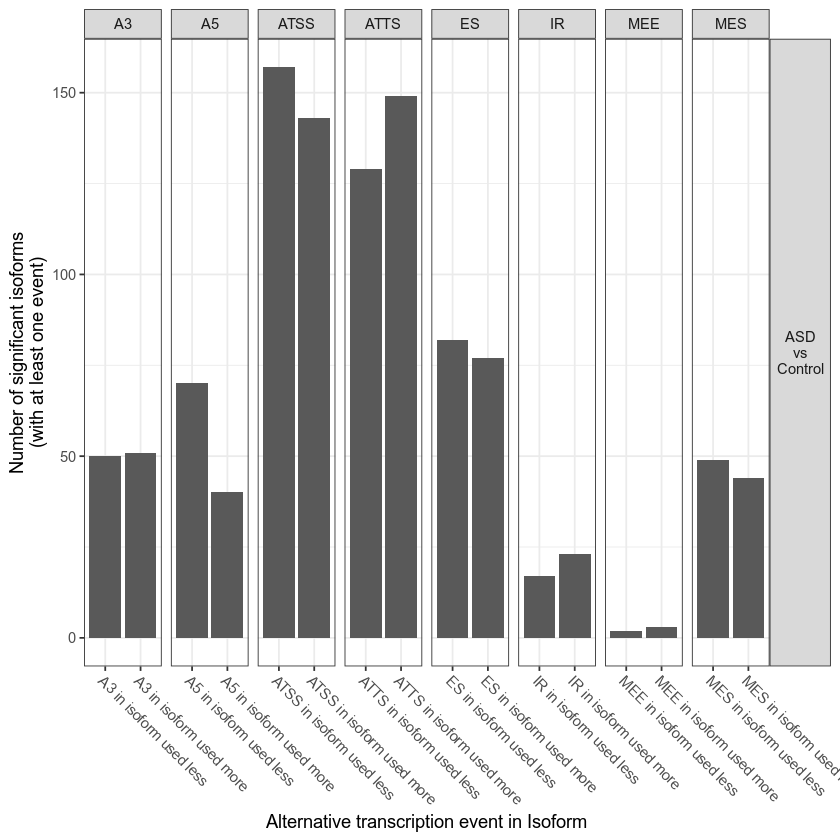

,condition_1,condition_2,AStype,nUp,nDown,propUp,propUpCiLo,propUpCiHi,propUpPval,propUpQval,Significant,Comparison
,<chr>,<chr>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,ASD,Control,A3 gain (paired with A3 loss),39,25,0.6093750,0.4793154,0.7289645,1.034219e-01,0.2068437566,FALSE,ASD vs Control
2,ASD,Control,A5 gain (paired with A5 loss),22,42,0.3437500,0.2294632,0.4730230,1.685819e-02,0.0674327602,FALSE,ASD vs Control
3,ASD,Control,ATSS gain (paired with ATSS loss),50,51,0.4950495,0.3940400,0.5963569,1.000000e+00,1.0000000000,FALSE,ASD vs Control
4,ASD,Control,ATTS gain (paired with ATTS loss),78,34,0.6964286,0.6024022,0.7797609,3.910542e-05,0.0003128433,TRUE,ASD vs Control
5,ASD,Control,ES (paired with EI),45,51,0.4687500,0.3661085,0.5733716,6.100683e-01,0.9761092258,FALSE,ASD vs Control
6,ASD,Control,IR gain (paired with IR loss),20,10,0.6666667,0.4718800,0.8271258,9.873715e-02,0.2068437566,FALSE,ASD vs Control
7,ASD,Control,MEE gain (paired with MEE loss),3,2,0.6000000,0.1466328,0.9472550,1.000000e+00,1.0000000000,FALSE,ASD vs Control
8,ASD,Control,MES (paired with MEI),26,28,0.4814815,0.3434296,0.6216349,8.919232e-01,1.0000000000,FALSE,ASD vs Control


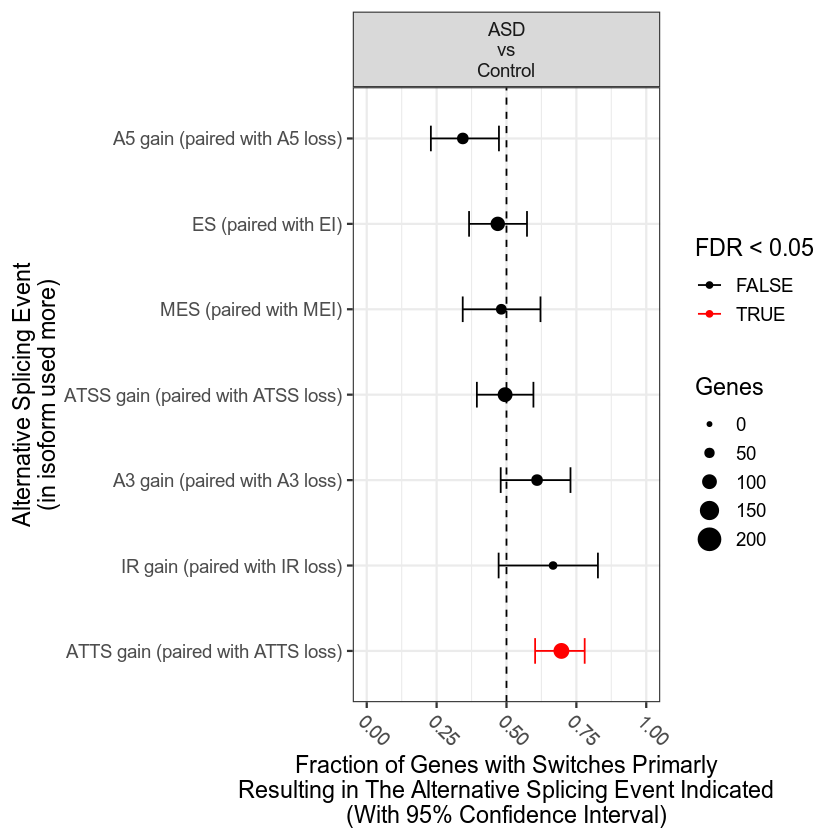

,comparison,category,isoform_feature,n,medianIF1,medianIF2,medianDIF,wilcoxPval,wilcoxQval,significance
,<chr>,<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ASD vs Control,A3,With A3,114,0.19805000,0.2110333,0.012983333,0.452380253,0.95661358,ns
2,ASD vs Control,A3,Without A3,315,0.20236667,0.1781333,-0.024233333,0.796285965,0.95661358,ns
3,ASD vs Control,A5,With A5,118,0.23956667,0.1598833,-0.079683333,0.057099110,0.30452859,ns
4,ASD vs Control,A5,Without A5,311,0.17466667,0.2007667,0.026100000,0.187151162,0.72711194,ns
5,ASD vs Control,ATSS,With ATSS,332,0.17468333,0.1815167,0.006833333,0.426542137,0.95661358,ns
6,ASD vs Control,ATSS,Without ATSS,97,0.26420000,0.2124667,-0.051733333,0.227222480,0.72711194,ns
7,ASD vs Control,ATTS,With ATTS,310,0.15590000,0.1749667,0.019066667,0.033198805,0.26559044,ns
8,ASD vs Control,ATTS,Without ATTS,119,0.40043333,0.2161333,-0.184300000,0.002256279,0.03610046,*
9,ASD vs Control,ES,With ES,175,0.16786667,0.1832000,0.015333333,0.608166306,0.95661358,ns


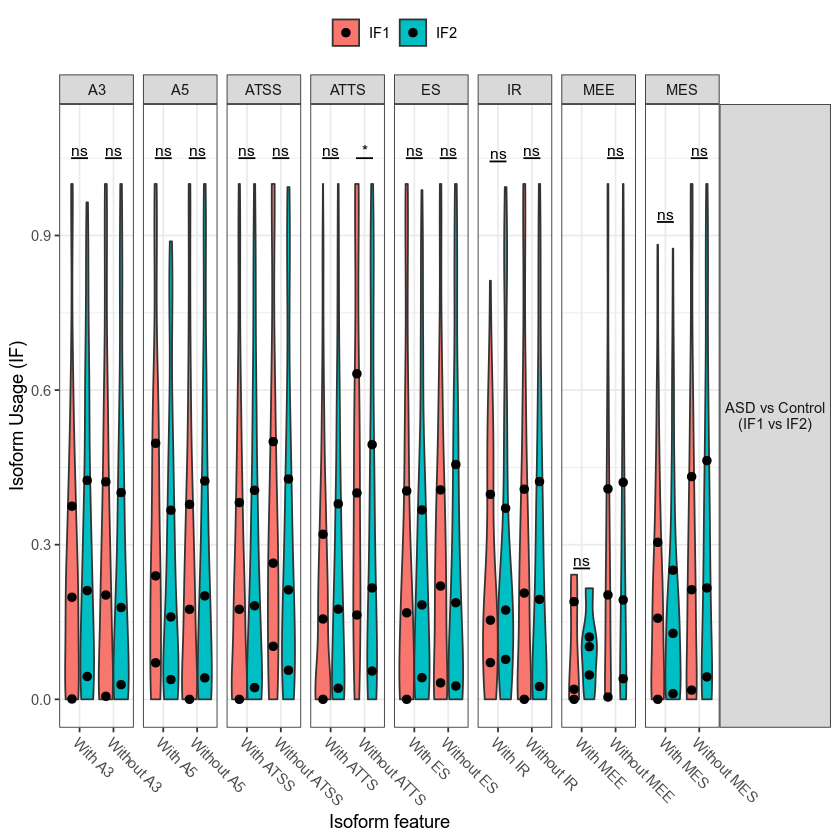

In [41]:
extractSplicingSummary(switchListA)
extractSplicingEnrichment(switchListA)
extractSplicingGenomeWide(switchListA)

In [ ]:
#attach(switchListCQ$switchConsequence)

In [ ]:
#length(unique(switchListCQ$switchConsequence$isoformDownregulated))


[1] 109

In [ ]:
#length(unique(c(switchListCQ$switchConsequence$isoformDownregulated,switchListCQ$switchConsequence$isoformUpregulated)))

[1] 210